In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 차원 축소: PCA (Principal Component Analysis, 주성분 분석)

- Unsupervised learning
- PCA는 데이터를 가장 잘 설명할 수 있는, 데이터의 분산을 최대화 하는 방향으로 축을 결정

In [4]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


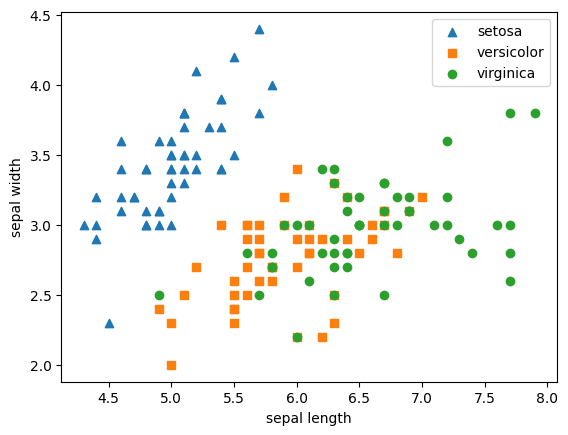

In [6]:
markers = ['^', 's', 'o']

for i,marker in enumerate(markers):
    x= iris_df[iris_df['target']==i]['sepal length (cm)']
    y= iris_df[iris_df['target']==i]['sepal width (cm)']
    plt.scatter(x,y,marker=marker, label=iris_data.target_names[i])
    

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

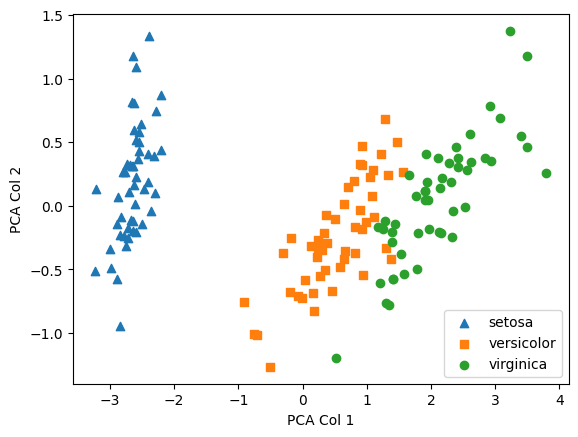

In [14]:
from sklearn.decomposition import PCA # PCA 모듈

pca = PCA(n_components=2)
X= iris_df.iloc[:, :-1]

pca.fit(X)
iris_pca = pca.transform(X)

#iris_df.iloc[:,:-1].shape ,iris_pca.shape # 4개의 차원에서 2개로 축소
iris_pca_df = pd.DataFrame(iris_pca, columns=['pca_col1', 'pca_col2'])
iris_pca_df['target'] = iris_data.target

markers = ['^', 's', 'o']
for i,marker in enumerate(markers):
    x= iris_pca_df[iris_pca_df['target']==i]['pca_col1']
    y= iris_pca_df[iris_pca_df['target']==i]['pca_col2']
    plt.scatter(x,y,marker=marker, label=iris_data.target_names[i])
    

plt.legend()
plt.xlabel('PCA Col 1')
plt.ylabel('PCA Col 2')
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score # 교차검증 진행해서 학습만 시키고 점수 뽑게 해줌

lr_clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr_clf, iris_data.data, iris_data.target, cv=5)

print(scores) # 5번 각각의 회차의 accuracy score (분류 문제인데, 따로 정확도 측정용 metric 지정 안해줘서)
print(f"원본 데이터 평가:", np.mean(scores), '\n')

#--------------------------------------------------------------------------------
# 축소된 차원으로 예측하기
lr_clf_pca = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr_clf_pca, iris_pca_df[['pca_col1', 'pca_col2']], iris_pca_df['target'], cv=5)

print(scores) # 5번 각각의 회차의 accuracy score (분류 문제인데, 따로 정확도 측정용 metric 지정 안해줘서)
print(f"PCA 데이터 평가:", np.mean(scores))

[0.96666667 1.         0.93333333 0.96666667 1.        ]
원본 데이터 평가: 0.9733333333333334 

[0.93333333 1.         0.93333333 0.93333333 1.        ]
PCA 데이터 평가: 0.96


### PCA 과일 이미지 데이터
 - 흑백 이미지 데이터 픽셀값 0(백)~255(흑) 

In [22]:
fruit_data = np.load('./data/fruits_300.npy')
fruit_data.shape # shape (300, 100, 100) => 300개의 이미지를 가지면서 각 이미지는 100*100 px

(300, 100, 100)

In [29]:
# 시각화 해주는 함수
def draw_fruits(arr, ratio=1):
    N = len(arr)
    rows = int(np.ceil(N / 10))
    cols = N if rows < 2 else 10
    fig, ax = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    plt.figure(figsize=(5,5))
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < N:
                ax[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            ax[i, j].axis('off')
    
    plt.show()

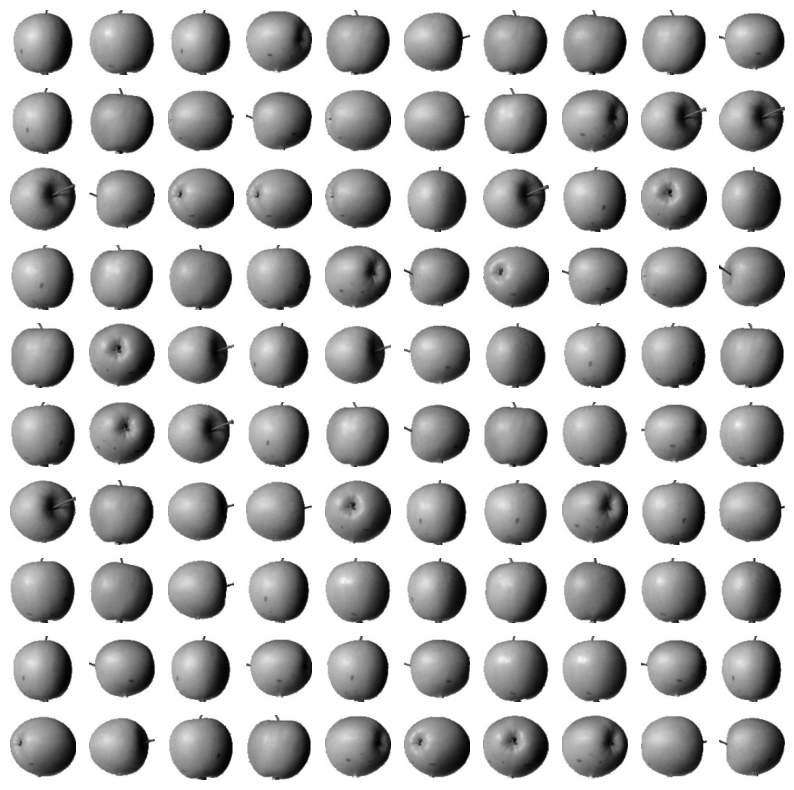

<Figure size 500x500 with 0 Axes>

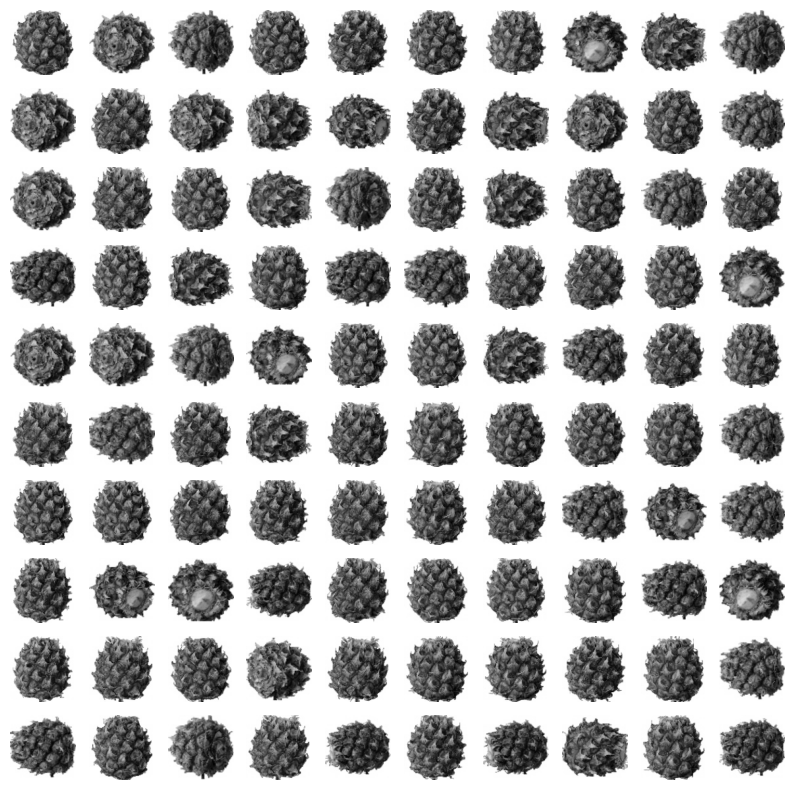

<Figure size 500x500 with 0 Axes>

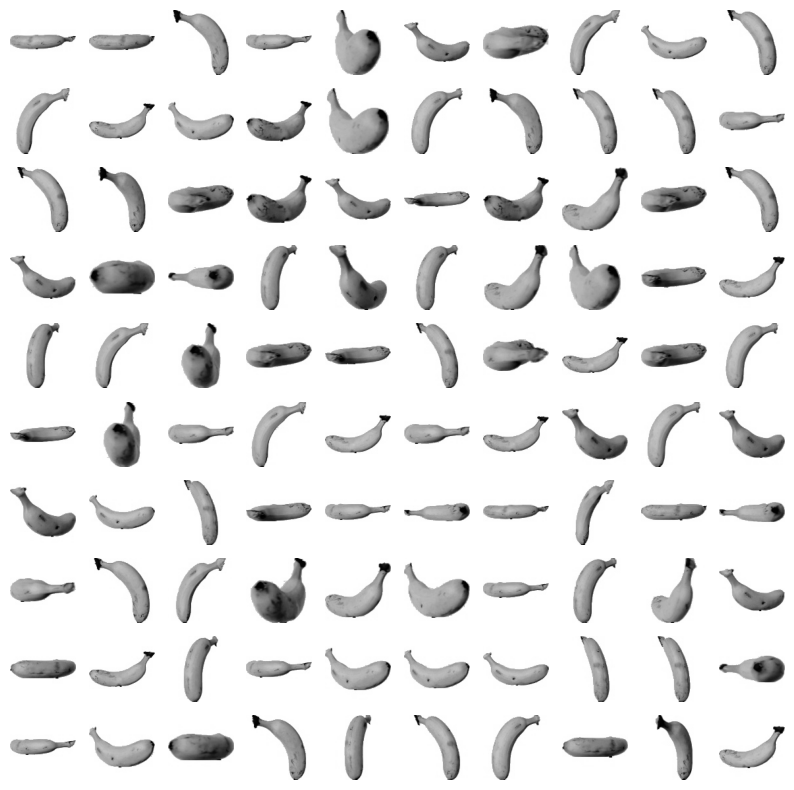

<Figure size 500x500 with 0 Axes>

In [30]:
draw_fruits(fruit_data[:100])
draw_fruits(fruit_data[100:200])
draw_fruits(fruit_data[200:])

In [32]:
fruit_1d = fruit_data.reshape(300, 100*100)
fruit_1d.shape #이미지 하나당 10000개의 특성(차원)이 있는 셈 

(300, 10000)

In [33]:
pca = PCA(n_components=50)
pca.fit(fruit_1d)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [36]:
pca.components_.shape # (50, 10000) = (pca로 구현한 주성분 개수, 원본 데이터 특성 개수) 

(50, 10000)

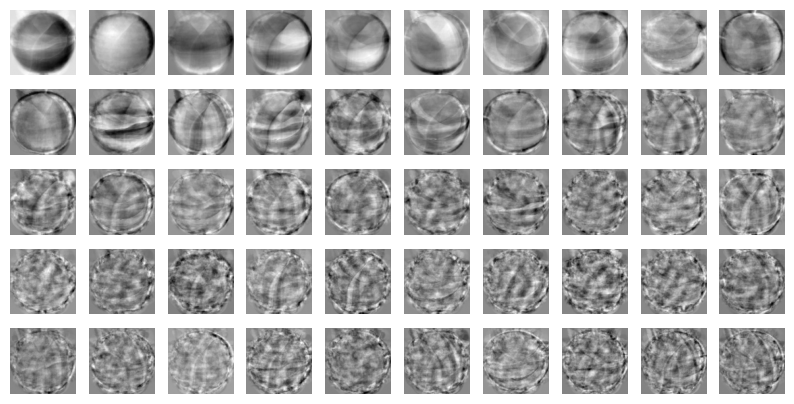

<Figure size 500x500 with 0 Axes>

In [37]:
# 다시 3차원으로 변환해서 그리기 (사과, 파인애플, 바나나 다 짬뽕되어있음)
draw_fruits(pca.components_.reshape(-1,100,100))

In [39]:
fruits_pca = pca.transform(fruit_1d)
fruits_pca.shape # (300, 50) => 300장의 사진을 각각 50개 feature 가지게 차원 축소해줌

np.save('./data/fruits_pca.npy', fruits_pca)

In [ ]:
# 문제 있나 없나 저장한거 load해서 확인
fruits_pca = np.load('./data/fruits_pca.npy')

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578895 0.00511203
 0.00486384 0.00480347 0.00447836 0.00437316 0.00408028 0.00389468
 0.00372439 0.00359273 0.00331473 0.00317832 0.00304274 0.00303716
 0.0028888  0.00275771 0.00264885 0.00255915 0.00251659 0.00247345
 0.00239476 0.00230107 0.00221923 0.00216669 0.00213296 0.00194929
 0.00192961 0.0019073  0.00183798 0.00182753 0.00173762 0.00168662
 0.00162686 0.00158789] 

0.921526778521618


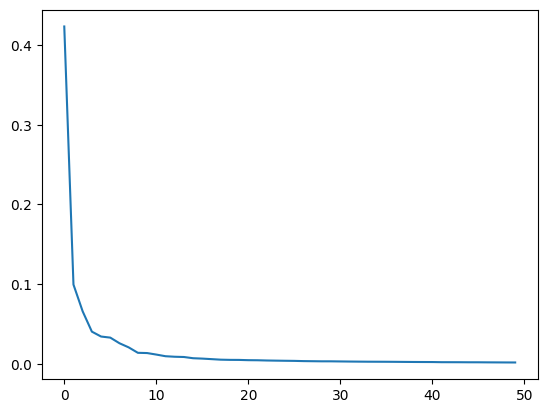

In [44]:
print(pca.explained_variance_ratio_, '\n') # 각각의 축소시킨 주성분이 원래 데이터를 얼마나 잘 설명하는지
print(np.sum(pca.explained_variance_ratio_)) # 이렇게 축소시킨 성분은 원본 데이터의 약 92.2프로 설명 가능 (나머지는 중요하지 않아서 버림)

plt.plot(pca.explained_variance_ratio_)
plt.show()

In [45]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [49]:
# cross_val_score: 각 cv의 점수 반환
# cross_validate: 각 cv의 학습시간, 테스트시간, cv의 점수 반환 (평가지표)
from sklearn.model_selection import cross_validate

# 원본 
lr_clf = LogisticRegression(max_iter=1000)
result = cross_validate(lr_clf, fruit_1d, target, cv=3)
print("원본 데이터 교차 검증")
print(result)

# PCA 한 것
lr_clf_pca = LogisticRegression(max_iter=1000)
result = cross_validate(lr_clf_pca, fruits_pca, target, cv=3)
print("PCA 데이터 교차 검증")
print(result)

원본 데이터 교차 검증
{'fit_time': array([0.16726327, 0.17063308, 0.14970517]), 'score_time': array([0.00299859, 0.00199556, 0.00196528]), 'test_score': array([1.  , 1.  , 0.99])}
PCA 데이터 교차 검증
{'fit_time': array([0.00808191, 0.00641274, 0.00294971]), 'score_time': array([0., 0., 0.]), 'test_score': array([1.  , 1.  , 0.99])}


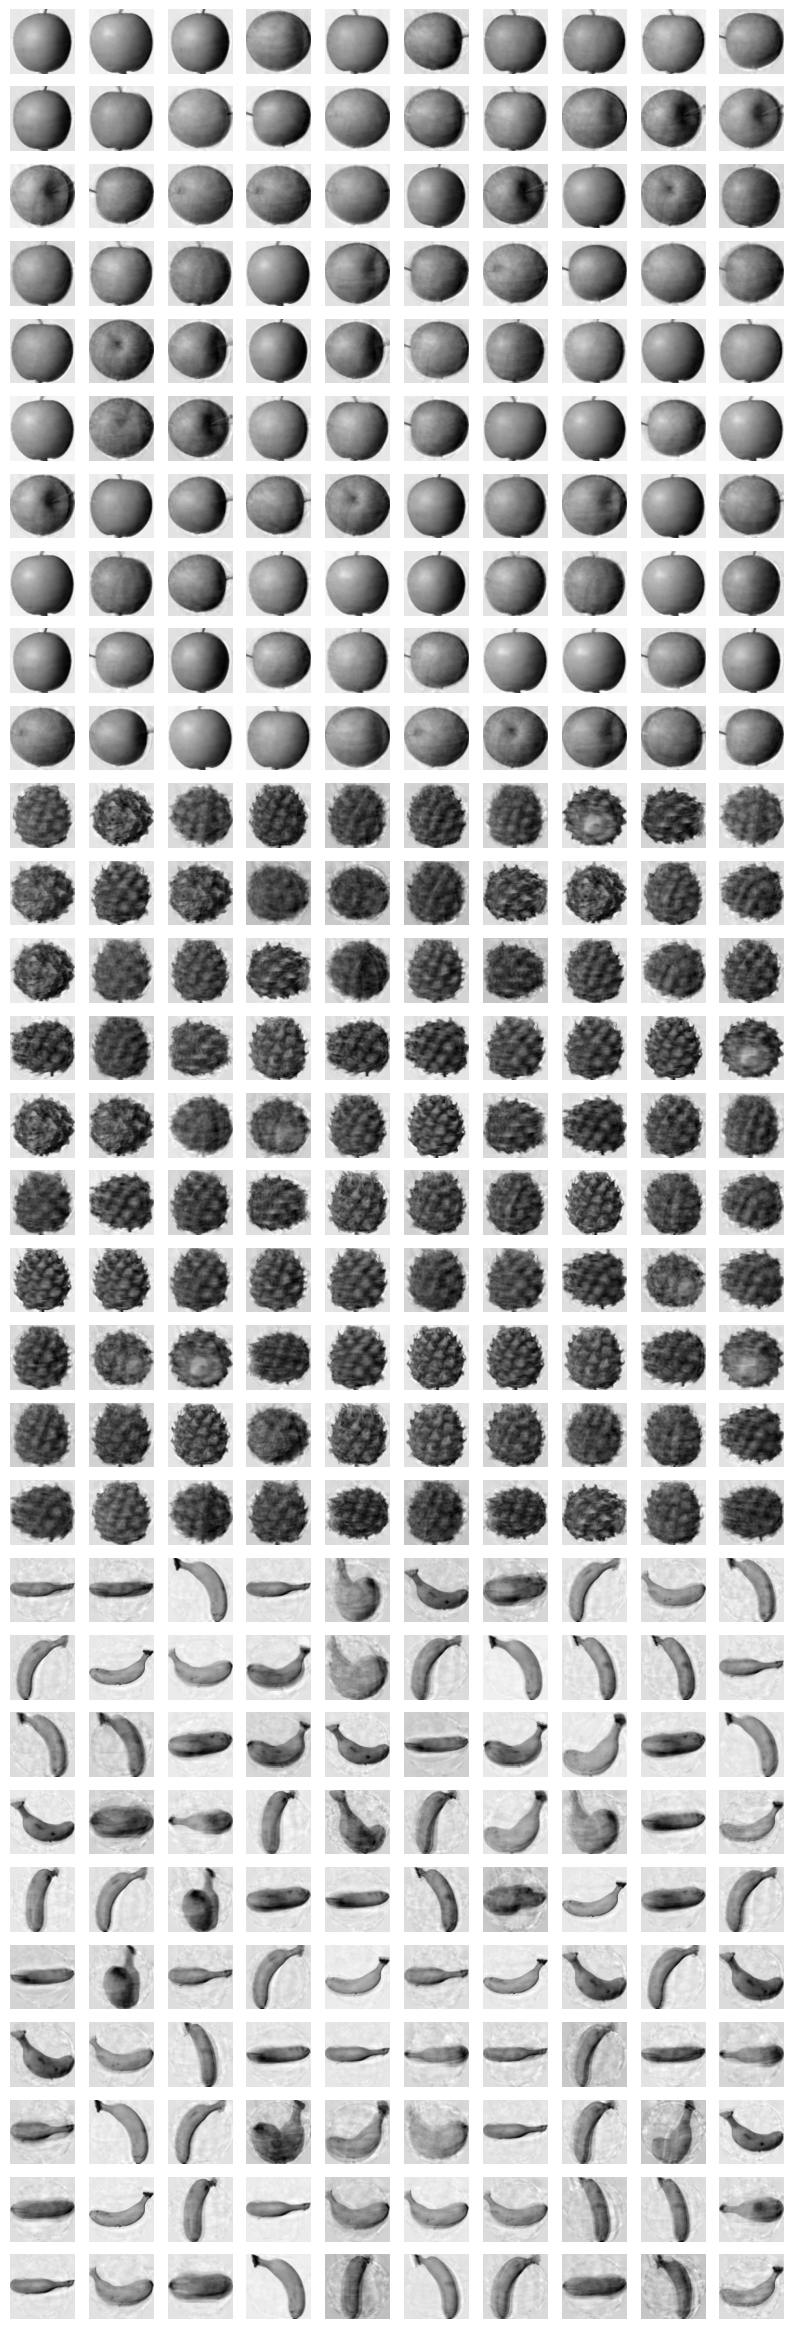

<Figure size 500x500 with 0 Axes>

In [52]:
# 데이터 복구해서 시각화
fruits_inverse = pca.inverse_transform(fruits_pca) # 축소된 차원 복구 (원본으로 복구 X, 7~8% 정도 소실 된 것)
fruits_inverse.shape # (300, 10000) -> 10000개의 feature로 복구가 된 것을 볼 수 있음

draw_fruits(fruits_inverse.reshape(-1,100,100))